# Logistic Regression: From Binary to Multinomial

A step-by-step walkthrough of logistic regression and its multiclass extensions.

We use **scikit-learn** to estimate the model parameters, then explore how the models work by plugging those parameters into the real equations ourselves.

**Outline**

1. Logistic regression with 2 classes
2. Logistic regression with more than 2 classes

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Helper Functions: Sigmoid and Softmax

These are the two key functions we'll use throughout.

**Sigmoid** squashes a real number into $(0, 1)$:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

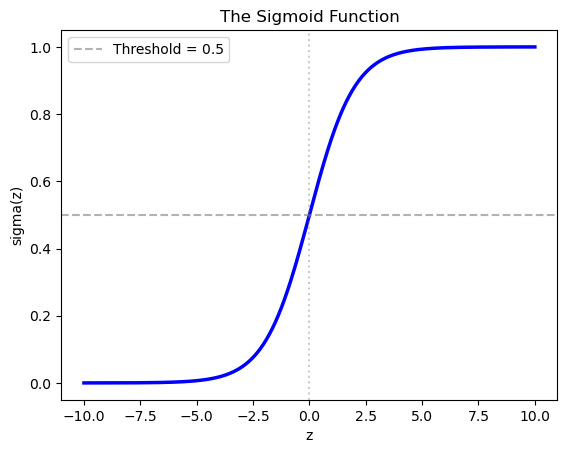

In [3]:
z = np.linspace(-10, 10, 300)


plt.plot(z, sigmoid(z), 'b-', linewidth=2.5)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.6, label='Threshold = 0.5')
plt.axvline(0, color='gray', linestyle=':', alpha=0.4)
plt.xlabel('z')
plt.ylabel('sigma(z)')
plt.title('The Sigmoid Function')
plt.legend()
plt.show()

---
# Part 1 — Binary Logistic Regression

## The Model

Logistic regression models the probability that an observation belongs to class 1:

$$P(y=1 \mid x) = \sigma(w x + b) = \frac{1}{1 + e^{-(wx+b)}}$$

The quantity $z = wx + b$ is called the **logit** (or log-odds). The sigmoid function maps it to a probability.

**Training** finds the values of $w$ and $b$ that maximize the likelihood of the observed data (maximum likelihood estimation). 

### Generate a dataset with two classes

In [4]:
np.random.seed(42)
n = 100
class0 = np.random.randn(n) * 1.0 + 2.0
class1 = np.random.randn(n) * 1.0 + 5.0

X_bin = np.concatenate([class0, class1]).reshape(-1, 1)
y_bin = np.array([0]*n + [1]*n)

idx = np.random.permutation(len(y_bin))
X_bin, y_bin = X_bin[idx], y_bin[idx]

pd.DataFrame({"X":X_bin.reshape(-1), "Class":y_bin.reshape(-1)})

,X,Class
0,2.314247,0
1,0.012431,0
2,4.838714,1
3,5.276691,1
4,5.521942,1
...,...,...
195,4.216747,1
196,4.025318,1
197,4.197723,1
198,0.987169,0


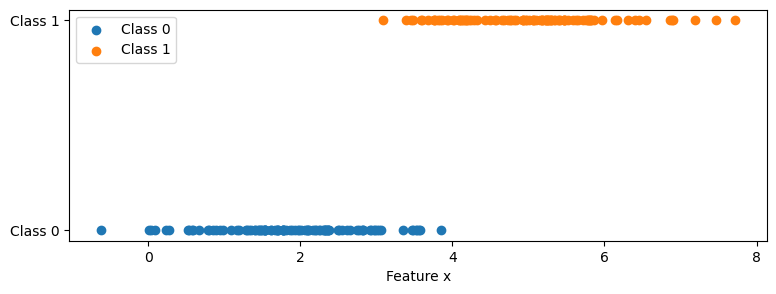

In [5]:
fig, ax = plt.subplots(figsize=(9, 3))
ax.scatter(X_bin[y_bin==0], np.zeros(n), label='Class 0')
ax.scatter(X_bin[y_bin==1], np.ones(n), label='Class 1')
ax.set_xlabel('Feature x')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Class 0', 'Class 1'])
ax.legend()
plt.show()

### Fit with Scikit-Learn

In [ ]:
clf_bin = LogisticRegression()
clf_bin.fit(X_bin, y_bin)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
w = clf_bin.coef_[0, 0]
b = clf_bin.intercept_[0]

print(w, b)

3.2728352214836547 -11.315989747873145


### Understanding the Fitted Model

Now that we have $w$ and $b$, let's plug them into the sigmoid equation ourselves and see what the model does.

$$\sigma(z) = \frac{1}{1 + e^{-(wx + b)}}$$

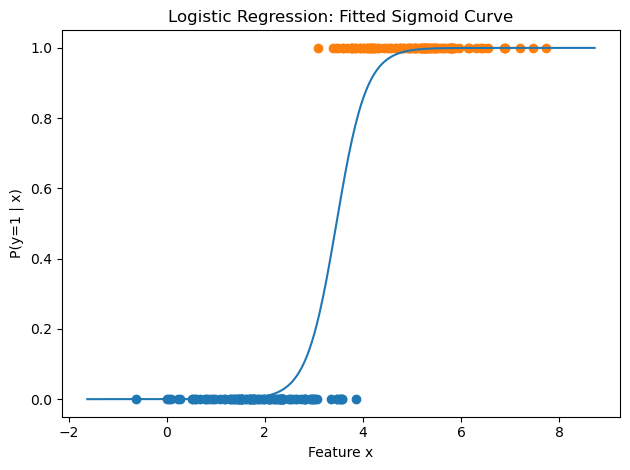

In [13]:
x_range = np.linspace(X_bin.min() - 1, X_bin.max() + 1, 300)

### CALCULATE LOGITS
logits = w * x_range + b

probabilities = sigmoid(logits)

plt.plot(x_range, probabilities)
plt.scatter(X_bin[y_bin==0], y_bin[y_bin==0], label='Class 0')

plt.scatter(X_bin[y_bin==1], y_bin[y_bin==1], label='Class 1')
plt.xlabel('Feature x')
plt.ylabel('P(y=1 | x)')
plt.title('Logistic Regression: Fitted Sigmoid Curve')


plt.tight_layout()
plt.show()

---
# Part 2 — Multiclass Classification


In [14]:
# Generate data
np.random.seed(42)
n = 80
c0 = np.random.randn(n) * 0.8 + 1.0
c1 = np.random.randn(n) * 0.8 + 4.0
c2 = np.random.randn(n) * 0.8 + 7.0

X_multi = np.concatenate([c0, c1, c2]).reshape(-1, 1)
y_multi = np.array([0]*n + [1]*n + [2]*n)
idx = np.random.permutation(len(y_multi))
X_multi, y_multi = X_multi[idx], y_multi[idx]

pd.DataFrame({"X":X_multi.reshape(-1), "Class":y_multi.reshape(-1)}).head(20)

,X,Class
0,4.237588,1
1,1.489341,0
2,3.358178,1
3,7.866441,2
4,7.272922,2
5,4.323241,1
6,3.046957,1
7,0.483904,0
8,2.481823,0
9,1.259267,0


Text(0.5, 0, 'X')

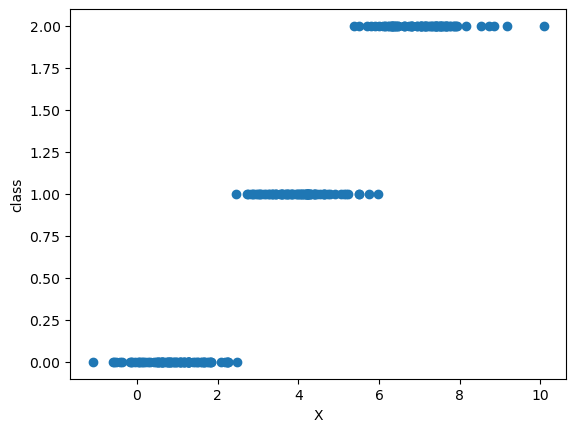

In [15]:
plt.scatter(X_multi, y_multi)
plt.ylabel("class")
plt.xlabel("X")

Let's start by considering class 0 only:

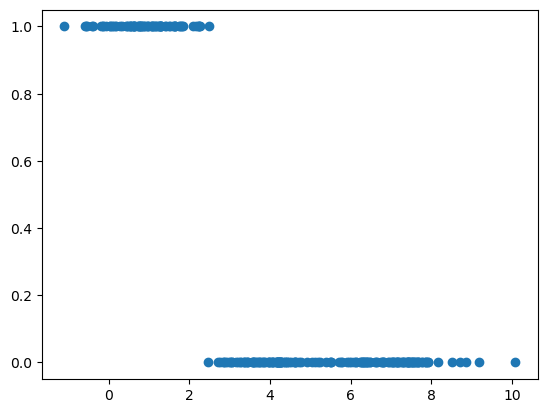

In [17]:
class_0 = (y_multi == 0)
plt.scatter(X_multi, class_0)

In [19]:
clf_0 = LogisticRegression()
clf_0.fit(X_multi, class_0)

w_0 = clf_0.coef_[0,0]
b_0 = clf_0.intercept_[0]

print(w_0, b_0)

-3.322819982911749 8.233864574662777


Text(0.5, 1.0, 'Logistic regression for class 0')

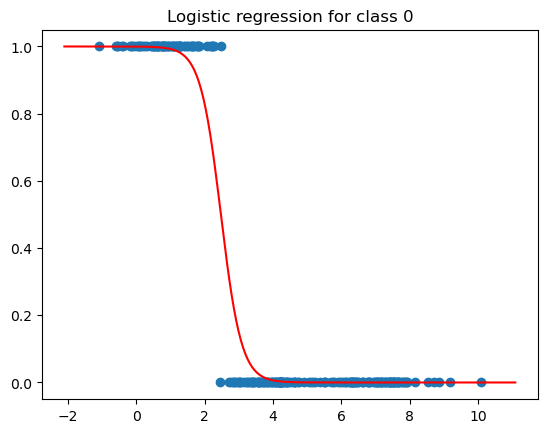

In [20]:
x_range = np.linspace(X_multi.min() - 1, X_multi.max() + 1, 400)

p_0 = sigmoid(w_0 * x_range + b_0)
plt.scatter(X_multi, class_0)
plt.plot(x_range, p_0,c="red")

plt.title("Logistic regression for class 0")

How might we consider the other two classes?

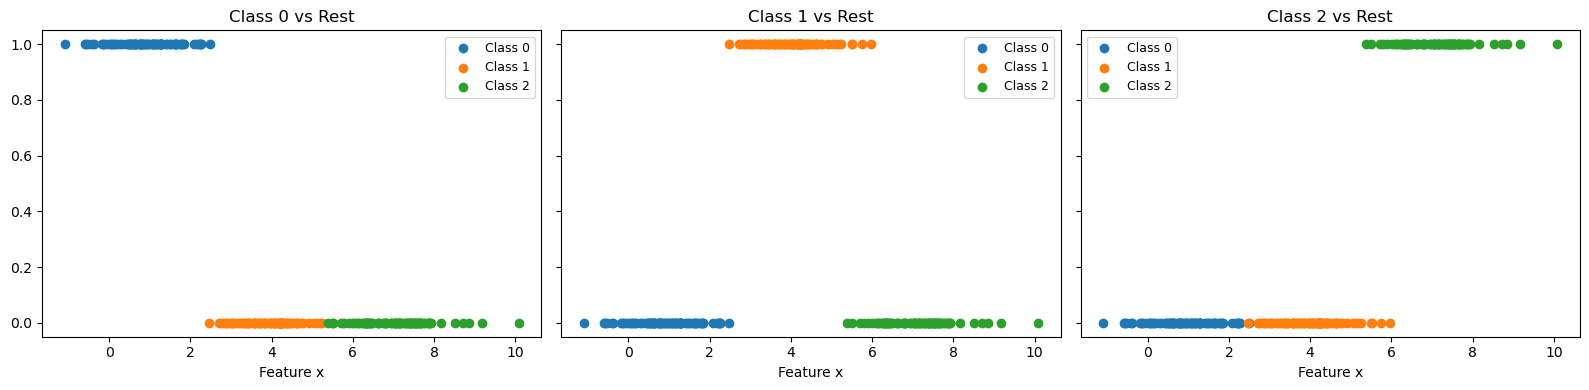

In [21]:
x_range = np.linspace(X_multi.min() - 1, X_multi.max() + 1, 400)

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
for k in range(3):
    ax = axes[k]
    
    # Show the binary problem this classifier sees
    for c in range(3):
        mask = y_multi == c
        y_binary = (y_multi[mask] == k).astype(float)
        ax.scatter(X_multi[mask], y_binary, label=f"Class {c}")
    
    ax.set_xlabel('Feature x')
    
    ax.set_title(f'Class {k} vs Rest')
    ax.legend(fontsize=9)
    
plt.tight_layout()
plt.show()

### Fit 3 Binary Classifiers (One per Class)

In [22]:
ova_models = {}

for k in range(3):
    y_k = (y_multi == k).astype(int)
    clf_k = LogisticRegression()
    clf_k.fit(X_multi, y_k)
    
    w_k = clf_k.coef_[0, 0]
    b_k = clf_k.intercept_[0]
    
    ova_models[k] = (w_k, b_k)
    print(f"Classifier {k} (class {k} vs rest): w = {w_k:+.4f}, b = {b_k:+.4f}")

Classifier 0 (class 0 vs rest): w = -3.3228, b = +8.2339
Classifier 1 (class 1 vs rest): w = -0.0015, b = -0.6871
Classifier 2 (class 2 vs rest): w = +3.0471, b = -16.9230


### Visualize Each OvA Classifier

Each classifier sees its own binary problem. Notice how each sigmoid curve fits the "one vs rest" split:

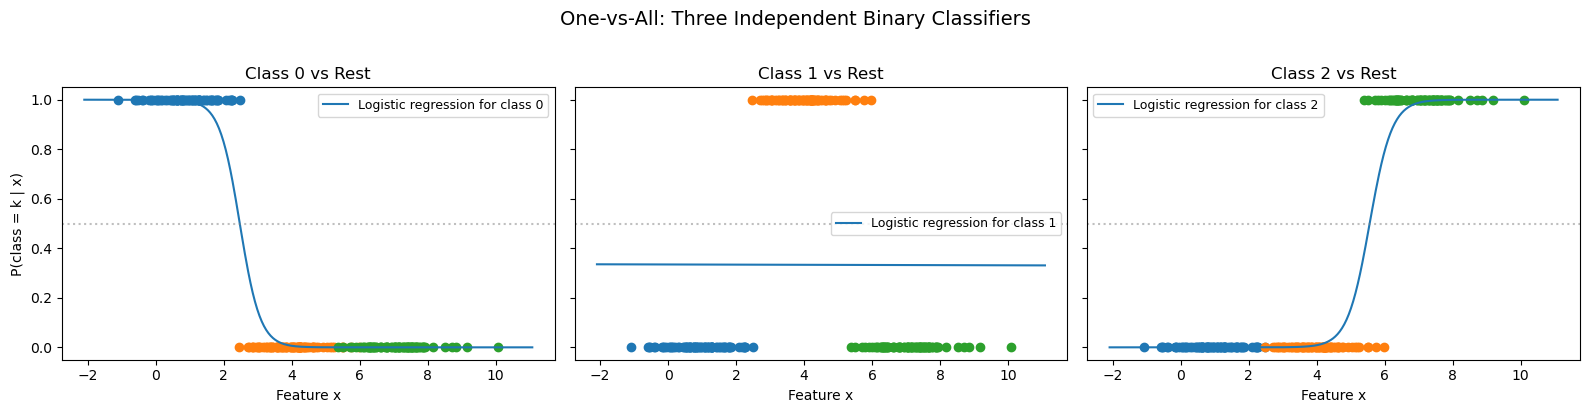

In [23]:
x_range = np.linspace(X_multi.min() - 1, X_multi.max() + 1, 400)

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
for k in range(3):
    ax = axes[k]
    w_k, b_k = ova_models[k]
    p_k = sigmoid(w_k * x_range + b_k)
    ax.plot(x_range, p_k, label=f'Logistic regression for class {k}')
    ax.axhline(0.5, color='gray', linestyle=':', alpha=0.5)
    
    # Show the binary problem this classifier sees
    for c in range(3):
        mask = y_multi == c
        y_binary = (y_multi[mask] == k).astype(float)
        ax.scatter(X_multi[mask], y_binary)
    
    ax.set_xlabel('Feature x')
    if k == 0:
        ax.set_ylabel('P(class = k | x)')
    ax.set_title(f'Class {k} vs Rest')
    ax.legend(fontsize=9)

plt.suptitle('One-vs-All: Three Independent Binary Classifiers', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### OvA Predictions — The Problem with Raw Scores

Each classifier outputs its own sigmoid probability independently. Let's see what happens when we look at all three together. 

Consider a point where x = 3.


In [24]:
x = 3

for k in range(3):
    w_k, b_k = ova_models[k]
    print(f"Probability this datapoint is in class {k}:", sigmoid(w_k * 3 + b_k))

Probability this datapoint is in class 0: 0.15000072436918407
Probability this datapoint is in class 1: 0.33366345448588536
Probability this datapoint is in class 2: 0.00041708854774654737


What is wrong with the above probabilities?

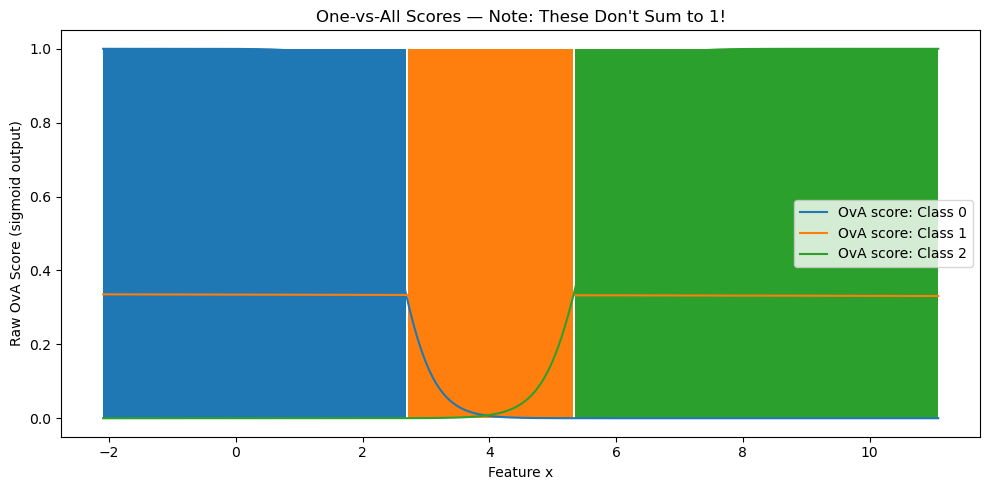

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
x_plot = np.linspace(X_multi.min() - 1, X_multi.max() + 1, 500)

for k in range(3):
    w_k, b_k = ova_models[k]
    p_k = sigmoid(w_k * x_plot + b_k)
    ax.plot(x_plot, p_k, label=f'OvA score: Class {k}')

# Shade background by predicted class
scores_plot = np.zeros((len(x_plot), 3))
for k in range(3):
    w_k, b_k = ova_models[k]
    scores_plot[:, k] = sigmoid(w_k * x_plot + b_k)
pred_plot = scores_plot.argmax(axis=1)
for k in range(3):
    mask = pred_plot == k
    ax.fill_between(x_plot, 0, 1, where=mask)

ax.set_xlabel('Feature x')
ax.set_ylabel('Raw OvA Score (sigmoid output)')
ax.set_title('One-vs-All Scores — Note: These Don\'t Sum to 1!')
ax.legend()
plt.tight_layout()
plt.show()

---
# Part 3 — Applying Softmax to OvA Outputs

The raw one-vs-all sigmoid scores don't form a valid probability distribution. We can fix this by applying the **softmax function** to the raw logits (the $z_k = w_k x + b_k$ values *before* the sigmoid):

$$P(y=k \mid x) = \text{softmax}(z_k) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$$


**Softmax** converts a vector of real numbers into a probability distribution:

In [26]:
def softmax(z):
    z_shift = z - z.max(axis=1, keepdims=True)
    exp_z = np.exp(z_shift)
    return exp_z / exp_z.sum(axis=1, keepdims=True)

In [30]:
x = 3

logits = np.zeros(shape=(1,3))

for k in range(3):
    w_k, b_k = ova_models[k]
    logits[0,k] = w_k * 3 + b_k

print(logits)

softmax(logits)

[[-1.73459537 -0.691662   -7.78179484]]


array([[2.60423936e-01, 7.38960299e-01, 6.15765765e-04]])

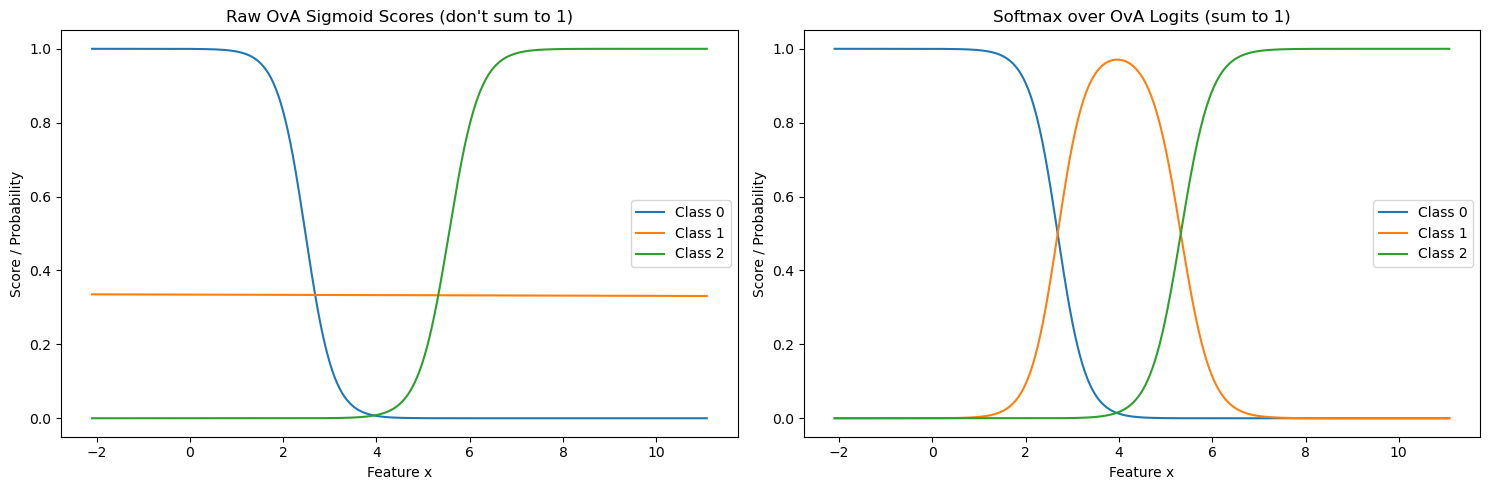

In [31]:
# Compare raw OvA vs softmax-normalized
x_plot = np.linspace(X_multi.min() - 1, X_multi.max() + 1, 500).reshape(-1, 1)

logits_plot = np.zeros((len(x_plot), 3))
for k in range(3):
    w_k, b_k = ova_models[k]
    logits_plot[:, k] = w_k * x_plot.ravel() + b_k

raw_scores = np.zeros_like(logits_plot)
for k in range(3):
    raw_scores[:, k] = sigmoid(logits_plot[:, k])
soft_scores = softmax(logits_plot)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx_ax, (title, sc) in enumerate([
    ("Raw OvA Sigmoid Scores (don't sum to 1)", raw_scores),
    ("Softmax over OvA Logits (sum to 1)", soft_scores)
]):
    ax = axes[idx_ax]
    for k in range(3):
        ax.plot(x_plot, sc[:, k], label=f'Class {k}')
    ax.set_xlabel('Feature x')
    ax.set_ylabel('Score / Probability')
    ax.set_title(title)
    ax.legend()
    ax.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

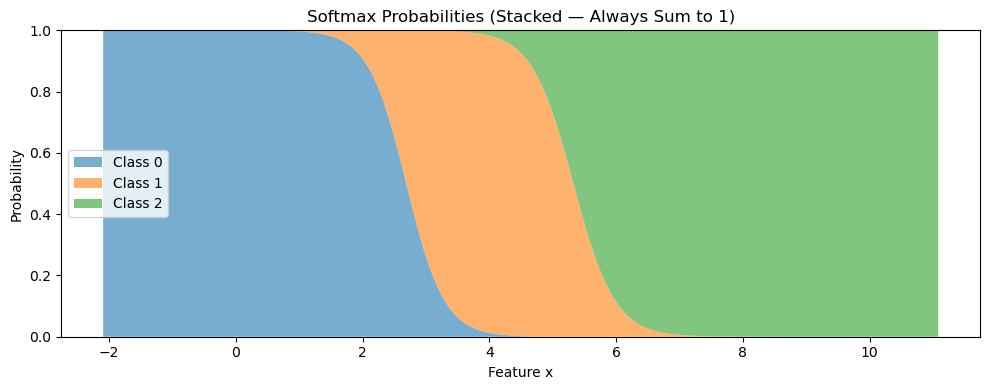

In [32]:
# Stacked area plot — clearly shows softmax outputs form a proper distribution
fig, ax = plt.subplots(figsize=(10, 4))
ax.stackplot(x_plot.ravel(), soft_scores[:, 0], soft_scores[:, 1], soft_scores[:, 2],
             alpha=0.6, labels=['Class 0', 'Class 1', 'Class 2'])
ax.set_xlabel('Feature x')
ax.set_ylabel('Probability')
ax.set_title('Softmax Probabilities (Stacked — Always Sum to 1)')
ax.legend(loc='center left')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

---
# Part 4 — Multinomial Logistic Regression (Single Feature)

Unlike OvA, multinomial logistic regression trains **all class weights jointly**. The model directly uses softmax:

$$P(y=k \mid x) = \frac{e^{w_k x + b_k}}{\sum_{j=1}^{K} e^{w_j x + b_j}}$$

This is also called **softmax regression**. The key difference from Part 3 is that the weights $w_k$ and biases $b_k$ are optimized *together* to produce a good probability distribution, rather than being trained independently and patched with softmax after the fact.

In [37]:
clf_multi_1d = LogisticRegression()
clf_multi_1d.fit(X_multi, y_multi)

W_mn = clf_multi_1d.coef_[:, 0]
B_mn = clf_multi_1d.intercept_

pred = clf_multi_1d.predict(X_multi)

accuracy_score(y_multi, pred)

0.975

### Comparison: OvA vs Softmax-on-OvA vs Multinomial

All three approaches side by side — the multinomial model produces the cleanest probability transitions:

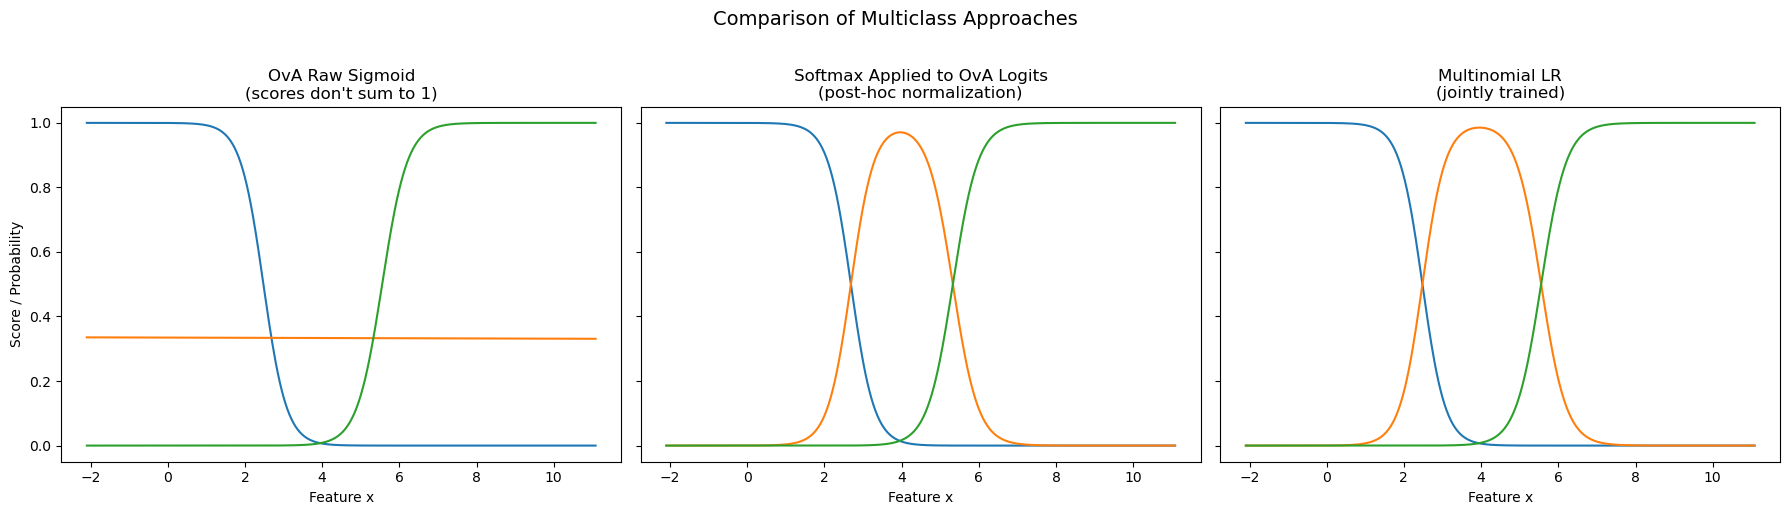

In [38]:
x_plot = np.linspace(X_multi.min() - 1, X_multi.max() + 1, 500).reshape(-1, 1)

# OvA raw sigmoid scores
logits_ova = np.zeros((len(x_plot), 3))
for k in range(3):
    w_k, b_k = ova_models[k]
    logits_ova[:, k] = w_k * x_plot.ravel() + b_k
ova_raw = np.zeros_like(logits_ova)
for k in range(3):
    ova_raw[:, k] = sigmoid(logits_ova[:, k])

# Softmax on OvA logits
ova_soft = softmax(logits_ova)

# Multinomial (jointly trained)
logits_mn_plot = np.outer(x_plot.ravel(), W_mn) + B_mn
mn_probs = softmax(logits_mn_plot)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
titles = ['OvA Raw Sigmoid\n(scores don\'t sum to 1)',
          'Softmax Applied to OvA Logits\n(post-hoc normalization)',
          'Multinomial LR\n(jointly trained)']
data = [ova_raw, ova_soft, mn_probs]

for i, (ax, title, probs) in enumerate(zip(axes, titles, data)):
    for k in range(3):
        ax.plot(x_plot, probs[:, k], label=f'Class {k}')
    ax.set_xlabel('Feature x')
    ax.set_title(title)
    if i == 0:
        ax.set_ylabel('Score / Probability')

plt.suptitle('Comparison of Multiclass Approaches', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()